In [51]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [52]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [53]:
# reading the CSV file into pandas dataframe
#mpg_df = pd.read_csv("car-mpg.csv")  
mpg_df = pd.read_csv('C:/Users/puneeth.raviprakash/OneDrive - Accenture/Desktop/Data Science/Supervised Learning/car-mpg.csv')

In [54]:
# Check top few records to get a feel of the data structure
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [55]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car name', axis=1)

In [56]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [60]:
mpg_df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [62]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [63]:
# print top 20 rows
mpg_df.head(n=20)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
5,15.0,8,429.0,198,4341,10.0,70,america
6,14.0,8,454.0,220,4354,9.0,70,america
7,14.0,8,440.0,215,4312,8.5,70,america
8,14.0,8,455.0,225,4425,10.0,70,america
9,15.0,8,390.0,190,3850,8.5,70,america


In [65]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [66]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [67]:
mpg_df.head(20)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,1,0,0


In [71]:
mpg_df['mpg'].std()

7.815984312565782

In [72]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [68]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [12]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [76]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column
temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['hp'] == False]   # from temp take only those rows where hp has false


,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [77]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [78]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [79]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 

In [80]:
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [81]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [94]:
mpg_df['hp'].median()

93.5

In [82]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())

mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [84]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [85]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object / string type to float
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [86]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:,0:9]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')



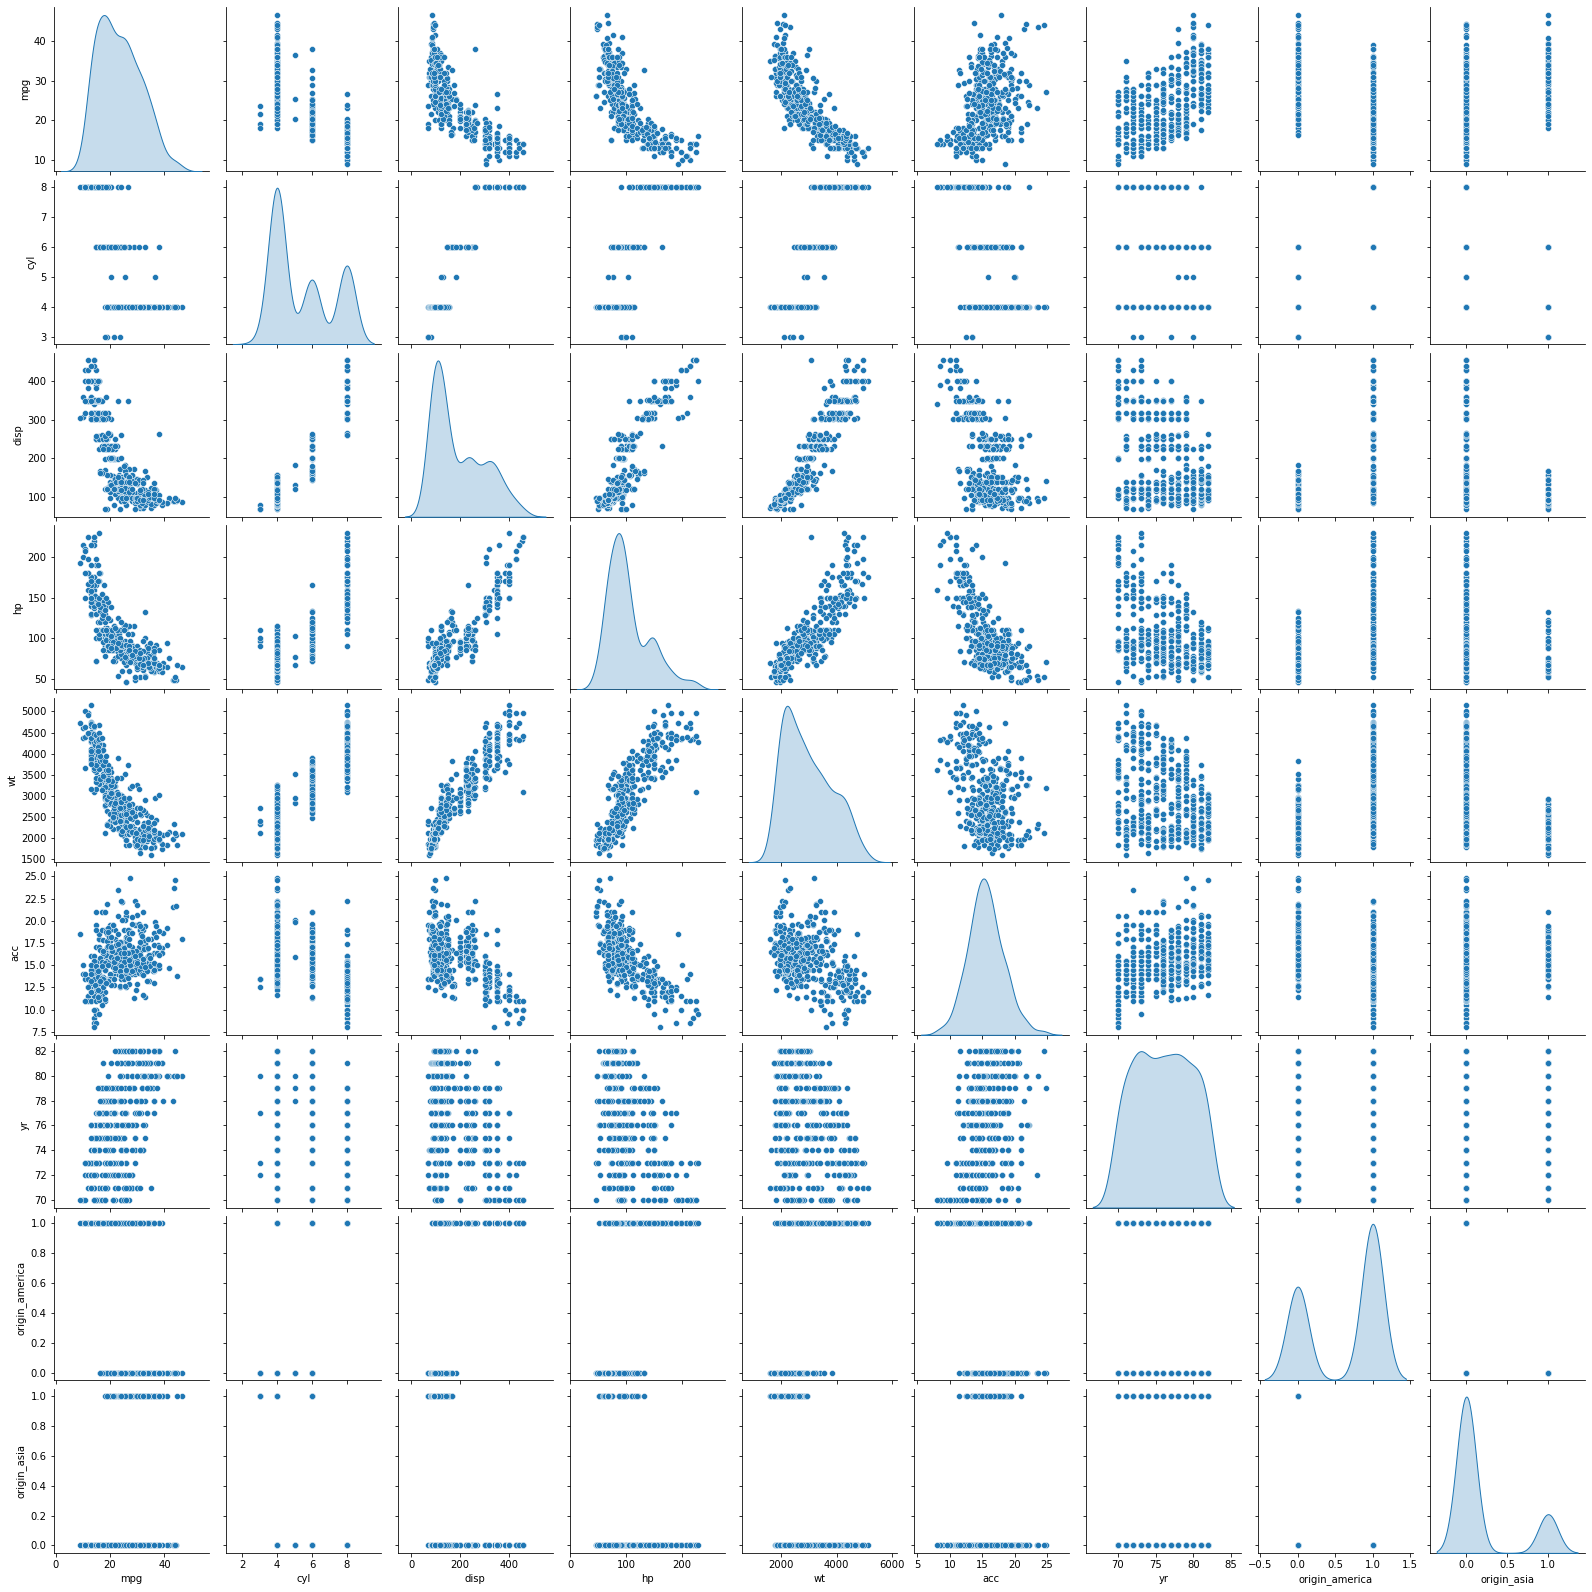

In [87]:
sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [35]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#How about 'mpg' vs 'yr' surprising to see a positive relation

In [88]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [89]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [90]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [91]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.3948079661648341
The coefficient for disp is 0.028945510765487608
The coefficient for hp is -0.021752207723547242
The coefficient for wt is -0.007352032065147365
The coefficient for acc is 0.061919366007618874
The coefficient for yr is 0.836933891764501
The coefficient for origin_america is -1.7988493458374297
The coefficient for origin_asia is 0.5964156907563449
The coefficient for origin_europe is 1.2024336550810852


In [48]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -19.485884771453232


In [49]:
# we can write our linear model as:
# Y=−21.11–0.35×X1+0.03×X2–0.02×X3–0.01×X4+0.12×X5+0.85×X6–1.90×X7+0.74×X8+1.16×X9

In [93]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8433135132808831

In [31]:
# So the model explains 84.4% of the variability in Y using X